In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import Image

In [2]:
data=pd.read_csv(r"C:\Users\manoj\Downloads\AAPL.csv")
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-23,174.940002,176.600006,172.100006,172.289993,169.739655,23624000
1,2018-11-26,174.240005,174.949997,170.259995,174.619995,172.035172,44998500
2,2018-11-27,171.509995,174.770004,170.880005,174.240005,171.660797,41387400
3,2018-11-28,176.729996,181.289993,174.929993,180.940002,178.261627,46062500
4,2018-11-29,182.660004,182.800003,177.699997,179.550003,176.892197,41770000
5,2018-11-30,180.289993,180.330002,177.029999,178.580002,175.936554,39531500
6,2018-12-03,184.460007,184.940002,181.210007,184.820007,182.084183,40802500
7,2018-12-04,180.949997,182.389999,176.270004,176.690002,174.074539,41344300
8,2018-12-06,171.759995,174.779999,170.419998,174.720001,172.133682,43098400
9,2018-12-07,173.490005,174.490005,168.300003,168.490005,165.995926,42281600


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
Date         251 non-null object
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
x=pd.to_numeric(data.Date.str.replace('-','')).values.reshape(-1,1)
y=data["Open"].values.reshape(-1,1)

In [5]:
x_train=x[0:240]
x_test=x[240:252]
y_train=y[0:240]
y_test=y[240:252]
x_train.shape

(240, 1)

In [6]:
svr_lin = SVR(kernel= 'linear', C= 1)
svr_rbf = SVR(kernel= 'rbf', C= 1, gamma= 0.1)

In [7]:
svr_rbf.fit(x_train,y_train.ravel())
svr_lin.fit(x_train,y_train.ravel())

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
lin_pred=svr_lin.predict(x_test)
rbf_pred=svr_rbf.predict(x_test)

In [9]:
lin_pred=lin_pred.reshape(-1,1)
lin_pred

array([[1.96891041e+08],
       [1.96884076e+08],
       [1.96863182e+08],
       [1.96856217e+08],
       [1.96849252e+08],
       [1.96842287e+08],
       [1.96835322e+08],
       [1.96814426e+08],
       [1.96807462e+08],
       [1.96800497e+08],
       [1.96793532e+08]])

In [10]:
rbf_pred=rbf_pred.reshape(-1,1)
rbf_pred

array([[198.39196067],
       [197.66914263],
       [196.49981052],
       [196.41934724],
       [196.39232206],
       [196.38492036],
       [196.38326432],
       [196.38291043],
       [196.38290987],
       [196.38290982],
       [196.38290982]])

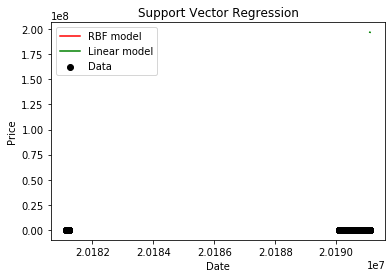

In [11]:
plt.scatter(x, y, color= 'black', label= 'Data') 
plt.plot(x_test,rbf_pred, color= 'red', label= 'RBF model')
plt.plot(x_test,lin_pred, color= 'green', label= 'Linear model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()


In [12]:
svr_lin.score(x_test,y_test)

-4154470958683966.0

In [13]:
print("Root mean square error linear kernel is",sqrt(mean_squared_error(lin_pred,y_test)))

Root mean square error linear kernel is 196839493.5816711


In [14]:
print("Root mean square error rbf kernel is",sqrt(mean_squared_error(rbf_pred,y_test)))

Root mean square error rbf kernel is 66.01028602190055


![alt text](https://i.kym-cdn.com/entries/icons/original/000/029/959/Screen_Shot_2019-06-05_at_1.26.32_PM.jpg)

#RBF kernel works better at stock price prediction 